Paquetes necesarios

In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

TAREA 1: Crea una imagen, p.e. de 800x800 píxeles, con la textura del tablero de ajedrez

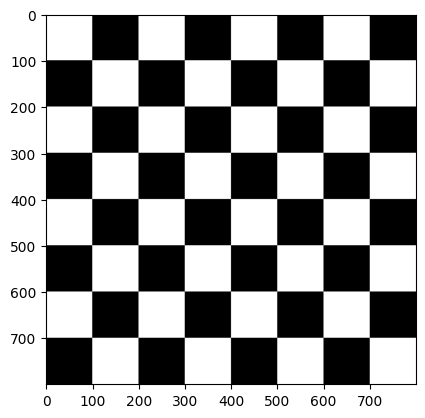

In [2]:
# TAREA 1
chess_height = 800
chess_width = 800
cell_height = chess_height // 8
cell_width = chess_width // 8

chess_table=np.zeros((chess_height,chess_width,1), dtype = np.uint8)
# Se crea un tablero negro

for i in range(8):
    for j in range(8):
        if (i+j)%2==0:
            chess_table[i*cell_height:(i+1)*cell_height,j*cell_width:(j+1)*cell_width]=255
# Se pintan las casillas blancas, que son las que la suma de fila y columna es par

plt.imshow(chess_table, cmap='gray') #Te animo a probar a eliminar la especificación del mapa de color
plt.show()

TAREA 2: Crear una imagen estilo Mondrian con las funciones de dibujo de OpenCV.

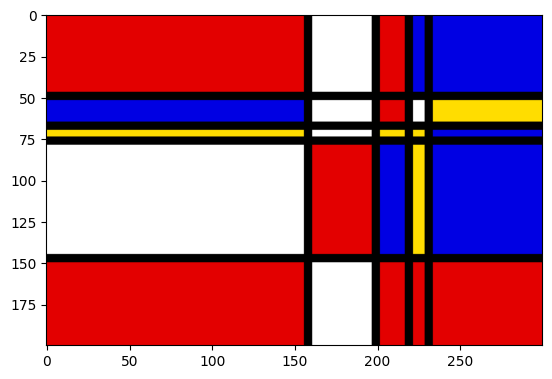

In [3]:
ancho = 300
alto = 200
color_img = np.full((alto,ancho,3),255, dtype = np.uint8)
colors=[(227, 0, 0),(0, 0, 227),(255, 221, 0),(255, 255, 255),(255, 255, 255)]

num_vlines = np.random.randint(3, 7)
num_hlines = np.random.randint(3, 6)

vlines = sorted(np.random.randint(30, ancho-30, num_vlines))
hlines = sorted(np.random.randint(20, alto-20, num_hlines))

vlines = [0] + vlines + [ancho]
hlines = [0] + hlines + [alto]

for i in range(len(hlines)-1):
    for j in range(len(vlines)-1):
        x_start, x_end = vlines[j], vlines[j+1]
        y_start, y_end = hlines[i], hlines[i+1]
        color = colors[np.random.randint(0, len(colors))]
        cv2.rectangle(color_img, (x_start, y_start), (x_end, y_end), color, -1)

for x in vlines[1:-1]:
    cv2.line(color_img, (x, 0), (x, alto), (0,0,0), 4)
for y in hlines[1:-1]:
    cv2.line(color_img, (0, y), (ancho, y), (0,0,0), 4)

cv2.imwrite('imagen.jpg', color_img)
plt.imshow(color_img)
plt.show()


TAREA 3: Modifica de forma libre los valores de un plano de la imagen.

In [4]:
vid = cv2.VideoCapture(0)
  
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        #Separamos canales
        b = frame[:,:,0]
        g = frame[:,:,1]
        r = frame[:,:,2]

        factor = 4
        # factor = 1 -> pantalla completa
        # factor = 2 -> media pantalla

        for i in range(b.shape[0]//factor):
            for j in range(b.shape[1]//factor):
                # Centra el filtro
                x_pos = int(b.shape[0]//factor*(0.5*(factor-2)+0.5)+i)
                y_pos = int(b.shape[1]//factor*(0.5*(factor-2)+0.5)+j)
                if b[x_pos,y_pos] < 127:
                    b[x_pos,y_pos] = 0
                    g[x_pos,y_pos] = 0
                    r[x_pos,y_pos] = 0
                else:
                    b[x_pos,y_pos] = 255
                    g[x_pos,y_pos] = 255
                    r[x_pos,y_pos] = 255

        h, w, c = frame.shape

        #Concateamos en horizontal los tres planos del fotograma
        #Modificamos de forma ibre los valores de un plano de la imágen
                
        collage = np.hstack((r, g, b))
    
        # Muestra fotograma redimensionando a la mitad para que quepa en pantalla
        cv2.imshow('RGB', cv2.resize(collage, (int(w*1.5),int(h/2)),cv2.INTER_NEAREST))
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

Evento de ratón para mostrar el valor RGB del píxel

In [5]:
# Función que trata eventos de ratón 
def mouse_events(event, x, y, flags, params):
    global px, py, R, G, B
    px = -1
    # Movimiento del puntero     
    if event==cv2.EVENT_MOUSEMOVE:
        #Valores del píxel, desde la webcam no es BGR
        B = frame[y, x, 0]
        G = frame[y, x, 1]
        R = frame[y, x, 2]  
        # Almacena valores del evento
        px = x
        py = y

     
  

TAREA 4:
Pintar círculos en las posiciones del píxel más claro y oscuro de la imagen 
¿Si quisieras hacerlo sobre la zona 8x8 más clara/oscura?

In [6]:
vid = cv2.VideoCapture(0)

# Tipografía para mostrar texto
font = cv2.FONT_HERSHEY_SIMPLEX
  
lanzado = 0 #bandera para primer fotograma
px = -1


def darkest_and_brightest_8x8_zone(frame: np.ndarray):
    H, W, C = frame.shape
    frame_cropped = frame.copy()

    # Conseguimos varios bloques de 8x8
    blocks = frame_cropped.reshape(H//8, 8, W//8, 8, C)
    
    # Calcular el promedio en cada bloque
    # axis 1 = alto, 3 = ancho, 4 = canales
    block_means = blocks.mean(axis=(1,3,4))
    
    # Se consigue el menor y mayor valor
    darkest_idx = np.unravel_index(np.argmin(block_means), block_means.shape)
    brightest_idx = np.unravel_index(np.argmax(block_means), block_means.shape)
    
    # Como se dividió entre 8 para conseguir los bloques, se multiplica por 8
    # y se suma 4 para conseguir el pixel central del bloque
    darkest_pixel = (darkest_idx[1]*8 + 4, darkest_idx[0]*8 + 4)
    brightest_pixel = (brightest_idx[1]*8 + 4, brightest_idx[0]*8 + 4)
    
    return darkest_pixel, brightest_pixel

while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret: 
        # Activa el manejador en el primer fotograma
        if lanzado == 0:
            # Muestra fotograma
            cv2.imshow('Cam', frame)   
            # Define el nombre del manejador del evento
            cv2.setMouseCallback('Cam', mouse_events)
            lanzado = 1

        # Muestra valores RGB intentando centrar en el puntero
        if px > -1:
            cv2.putText(frame, '{}'.format(R), (px-45,py-5), font, 0.5, (0, 0, 255), 1)
            cv2.putText(frame, '    {}'.format(G), (px-45,py-5), font, 0.5, (0, 255, 0), 1)
            cv2.putText(frame, '        {}'.format(B), (px-45,py-5), font, 0.5, (255, 0, 0), 1)
            
        darkest_pixel, brightest_pixel = darkest_and_brightest_8x8_zone(frame)
        cv2.circle(frame, darkest_pixel, 5, (255, 0, 0), -1)
        cv2.circle(frame, brightest_pixel, 5, (0, 255, 0), -1)

        cv2.imshow('Cam', frame)   
        
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

TAREA: Llevar a cabo una propuesta propia de pop art

In [7]:
import cv2
import numpy as np

vid = cv2.VideoCapture(0)

ncells = 10
off = int(ncells/2)

def getPopArtColor(r, g, b, x, y, x_size, y_size):
    if x < x_size//2:
        if y < y_size//2:
            return (int(r[y, x]), int(g[y, x]), int(b[y, x]))
        else:
            return (255-int(b[y, x]), int(r[y, x]), int(g[y, x]))
    else:
        if y < y_size//2:
            return (int(g[y, x]), 255-int(b[y, x]), int(r[y, x]))
        else:
            return (int(g[y, x]), int(b[y, x]), 255-int(r[y, x]))


while True:      
    ret, frame = vid.read()
    if ret:
        h, w, c = frame.shape
        down_frame = cv2.resize(frame, (w//ncells, h//ncells), cv2.INTER_NEAREST)
        h2, w2, c2 = down_frame.shape

        r = down_frame[:,:,0]
        g = down_frame[:,:,1]
        b = down_frame[:,:,2]

        colored_up_frame = np.zeros((h2*ncells, w2*ncells, 3), dtype=np.uint8)

        for y in range(h2):
            for x in range(w2):
                cx = x * ncells + off
                cy = y * ncells + off
                scale = int(int(r[y, x]) + int(g[y, x]) + int(b[y, x])) // 3
                color = getPopArtColor(r, g, b, x, y, w2, h2)
                cv2.line(colored_up_frame, (cx-off, cy-off), (cx+off, cy+off), color, 3)

        cv2.imshow('Cam', colored_up_frame)

    if cv2.waitKey(20) == 27:
        break

vid.release()
cv2.destroyAllWindows()
